In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False) 

c:\Users\wooyong\anaconda3\envs\kwix\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\wooyong\AppData\Local\Temp/ipykernel_24948/1601906870.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


# Data
### 데이터 압축과정

In [2]:
# customer_data = pd.read_csv('customer_data.csv')
# market_data = pd.read_csv('market_data.csv')
# order_data = pd.read_csv('order_data.csv')
# product_data = pd.read_csv('product_data.csv')

In [3]:
# merged_df = pd.merge(order_data, product_data, on = 'product_code',how = 'left') # 얘는 문제없음 market_code가 비어있음
# merged2_df = pd.merge(merged_df, market_data, on = 'market_code', how = 'left')
# merged3_df = pd.merge(merged2_df, customer_data, on = 'customer_id', how = 'left')
# df = merged3_df

# df = df.drop(['partner_code_y','location_y'], axis = 1)
# df = df.rename(columns={
#     'customer_id': 'ID',
#     'order_id': '영수증번호',
#     'on_off_div': '채널구분',
#     'partner_code_x': '제휴사',
#     'market_code': '점포코드',
#     'product_code': '상품코드',
#     'buy_date': '구매일자',
#     'buy_hour': '구매시간',
#     'buy_amount': '구매금액',
#     'buy_count': '구매수량',
#     'product': '상품명',
#     'large_product_cat': '대분류명',
#     'mid_product_cat': '중분류명',
#     'location_x': '점포대분류코드',
#     'location_detail': '점포중분류코드',
#     'gender': '성별',
#     'age_group': '연령대',
#     })

In [2]:
# df.to_pickle('new_order.pkl')
df = pd.read_pickle('new_order.pkl')

In [6]:
df[df['채널구분'] ==1].isnull().sum()
df[df['채널구분'] ==2].isnull().sum()

ID              0
영수증번호           0
채널구분            0
제휴사             0
점포코드       428501
상품코드            0
구매일자            0
구매시간            0
구매금액            0
구매수량            0
상품명             0
대분류명            0
중분류명            0
점포대분류코드    428501
점포중분류코드    428501
성별              0
연령대             0
dtype: int64

In [3]:
df

,ID,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,상품명,대분류명,중분류명,점포대분류코드,점포중분류코드,성별,연령대
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,여성,40대
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40대
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40대
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40대
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40대


In [16]:
df[df['점포코드'].isnull()]['채널구분'].value_counts()

2    428501
Name: 채널구분, dtype: int64

### 1. 점포코드 결측값 제거
- 방법: 점포코드의 결측치는 온라인으로 간주하고, 현재의 데이터프레임을 온라인 점포/ 오프라인 점포로 분류한다.

- 이유: 채널구분 컬럼을 기준으로 groupby를 진행해서 각각의 점포코드 결측치를 계산했을 때, 점포코드의 결측치는 모두 채널이 2인 경우에 존재함을 확인했다. 따라서 점포코드가 없는 것은 온라인 매장이었기 때문임을 파악했고, 이를 활용하여 데이터프레임을 분할하여 전처리를 진행한다.

#### 채널구분을 기준으로 데이터프레임 분할

In [5]:
on = df[df['채널구분'] == 2].reset_index(drop = True)
on.drop('채널구분', axis = 1, inplace = True, errors = 'ignore')
on['점포코드'].fillna('온라인', inplace = True)
on.drop_duplicates(keep = 'first', inplace = True)
on.drop(columns = ['점포대분류코드','점포중분류코드'], inplace = True)
on = on.set_index('ID')

off = df[df['채널구분'] == 1].reset_index(drop = True)
off.drop('채널구분', axis = 1, inplace = True, errors = 'ignore')
off.drop_duplicates(keep ='first', inplace = True)
off = off.set_index('ID')

In [6]:
on['구매일자'] = pd.to_datetime(on['구매일자'], format = '%Y%m%d')
on.insert(5, '구매연도', on['구매일자'].dt.year)
on.insert(6, '구매월', on['구매일자'].dt.month)
on.insert(7, '구매일', on['구매일자'].dt.day)
on.insert(8, '구매요일', on['구매일자'].dt.day_name('ko_KR'))
on.insert(11, '총액', on['구매금액'] * on['구매수량'])

off['구매일자'] = pd.to_datetime(off['구매일자'], format = '%Y%m%d')
off.insert(5, '구매연도', off['구매일자'].dt.year)
off.insert(6, '구매월', off['구매일자'].dt.month)
off.insert(7, '구매일', off['구매일자'].dt.day)
off.insert(8, '구매요일', off['구매일자'].dt.day_name('ko_KR'))
off.insert(11, '총액', off['구매금액'] * off['구매수량'])

off.drop(columns = ['구매일자'], inplace = True)
on.drop(columns = ['구매일자'], inplace = True)

on['성별'] = on['성별'].str.replace('여성', '1')
on['성별'] = on['성별'].str.replace('남성', '0')
on['성별'] = on['성별'].astype('int')
on['연령대'] = on['연령대'].str.replace('대','')
on['연령대'] = on['연령대'].astype('int')

off['성별'] = off['성별'].str.replace('여성', '1')
off['성별'] = off['성별'].str.replace('남성', '0')
off['성별'] = off['성별'].astype('int')
off['연령대'] = off['연령대'].str.replace('대','')
off['연령대'] = off['연령대'].astype('int')

In [7]:
display(on.head(),off.head())

,영수증번호,제휴사,점포코드,상품코드,구매연도,구매월,구매일,구매요일,구매시간,구매금액,총액,구매수량,상품명,대분류명,중분류명,성별,연령대
ID,,,,,,,,,,,,,,,,,
M533330698,E01000012036,A01,온라인,PD0954,2021,1,1,금요일,1,39000.0,39000.0,1,여성스웨터/풀오버,여성의류,여성의류상의,1,30
M661395471,E01000013847,A01,온라인,PD1706,2021,1,1,금요일,10,168000.0,168000.0,1,남성백팩,패션잡화,남성가방,0,40
M594992791,E01000014987,A01,온라인,PD1810,2021,1,1,금요일,11,30000.0,30000.0,1,남성장갑,패션잡화,장갑,1,40
M263406446,E01000015117,A01,온라인,PD0302,2021,1,1,금요일,12,335000.0,335000.0,1,남성패딩,남성의류,남성의류아우터,1,40
M182645944,E01000016766,A01,온라인,PD1782,2021,1,1,금요일,13,107100.0,107100.0,1,여성스니커즈,패션잡화,여성화,0,20


,영수증번호,제휴사,점포코드,상품코드,구매연도,구매월,구매일,구매요일,구매시간,구매금액,총액,구매수량,상품명,대분류명,중분류명,점포대분류코드,점포중분류코드,성별,연령대
ID,,,,,,,,,,,,,,,,,,,
M430112881,A01000001113,A01,A010039,PD0290,2021,1,1,금요일,10,15000.0,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,1,50
M646853852,A01000002265,A01,A010025,PD1369,2021,1,1,금요일,10,79700.0,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,1,40
M430112881,A01000003148,A01,A010039,PD0290,2021,1,1,금요일,10,19000.0,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,1,50
M430112881,A01000004946,A01,A010039,PD0290,2021,1,1,금요일,10,19000.0,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,1,50
M430112881,A01000005297,A01,A010039,PD1692,2021,1,1,금요일,10,9900.0,9900.0,1,커피/음료,테넌트/음식점,식당,Z10,Z10042,1,50


In [8]:
on

,영수증번호,제휴사,점포코드,상품코드,구매연도,구매월,구매일,구매요일,구매시간,구매금액,총액,구매수량,상품명,대분류명,중분류명,성별,연령대
ID,,,,,,,,,,,,,,,,,
M533330698,E01000012036,A01,온라인,PD0954,2021,1,1,금요일,1,39000.0,39000.0,1,여성스웨터/풀오버,여성의류,여성의류상의,1,30
M661395471,E01000013847,A01,온라인,PD1706,2021,1,1,금요일,10,168000.0,168000.0,1,남성백팩,패션잡화,남성가방,0,40
M594992791,E01000014987,A01,온라인,PD1810,2021,1,1,금요일,11,30000.0,30000.0,1,남성장갑,패션잡화,장갑,1,40
M263406446,E01000015117,A01,온라인,PD0302,2021,1,1,금요일,12,335000.0,335000.0,1,남성패딩,남성의류,남성의류아우터,1,40
M182645944,E01000016766,A01,온라인,PD1782,2021,1,1,금요일,13,107100.0,107100.0,1,여성스니커즈,패션잡화,여성화,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M816318679,E06052115831,A06,온라인,PD0507,2021,12,31,금요일,22,50000.0,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,1,40
M816318679,E06052116037,A06,온라인,PD0507,2021,12,31,금요일,22,10000.0,10000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,1,40
M182645944,E06052117103,A06,온라인,PD0294,2021,12,31,금요일,23,289000.0,289000.0,1,남성가디건,남성의류,남성의류상의,0,20


In [36]:
import statsmodels.api as sm

# 제휴사 count 계산
grouped_data = on.groupby(['제휴사', '구매월']).size().reset_index(name='count')

# 독립 변수(X)와 종속 변수(y) 설정
X = grouped_data['count']
y = grouped_data['구매월']

# 회귀 모델 생성 및 학습
X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    구매월   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     11.98
Date:                Sun, 21 May 2023   Prob (F-statistic):            0.00102
Time:                        11:57:45   Log-Likelihood:                -153.84
No. Observations:                  60   AIC:                             311.7
Df Residuals:                      58   BIC:                             315.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3470      0.480     15.313      0.0

In [38]:
# 상관 분석 수행
correlation = on['구매수량'].corr(on['구매요일'])

print("구매월과 구매수량의 상관 계수:", correlation)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# compare_col = ['연령대'] #구매월 시각화 해볼 필요있을듯

# display(off[compare_col].value_counts(normalize = True).sort_values(ascending = False), on[compare_col].value_counts(normalize = True).sort_values(ascending = False))

Text(0, 0.5, '매출금액')

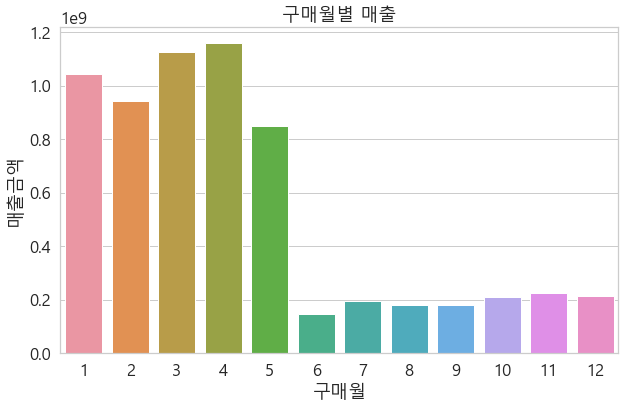

In [ ]:
sales_by_month = on.groupby('구매월')['구매금액'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='구매월', y='구매금액', data=sales_by_month)
plt.title('구매월별 매출')
plt.xlabel('구매월')
plt.ylabel('매출금액')

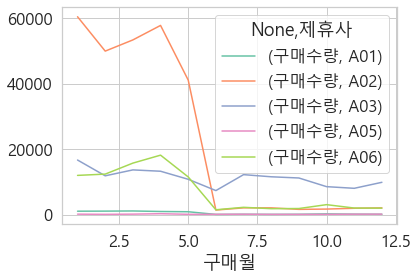

In [ ]:
on_aff = on.groupby(['구매월', '제휴사'])['구매수량'].sum().to_frame().unstack(); on_aff
on_aff.plot.line() # subplots = False
plt.show()

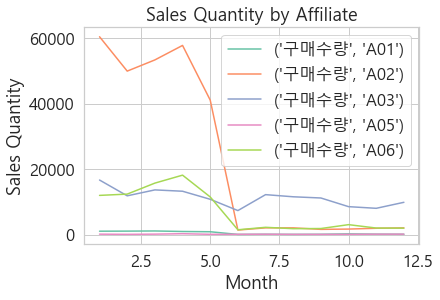

In [ ]:
months = range(1, 13)

for affiliate, sales in on_aff.items():
    plt.plot(months, sales, label=affiliate)

plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity by Affiliate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
affiliate_list = on['제휴사'].unique()

# 제휴사별 월별 판매수량 계산
sales_by_affiliate_month = on.groupby(['제휴사', '구매월'])['구매수량'].sum().unstack(fill_value=0)

# 행과 열을 전환
sales_by_affiliate_month = sales_by_affiliate_month.transpose()
sales_by_affiliate_month['합계'] = sales_by_affiliate_month['A01']+ sales_by_affiliate_month['A02'] + sales_by_affiliate_month['A03'] + sales_by_affiliate_month['A05'] + sales_by_affiliate_month['A06']

pd.options.display.float_format = '{:.5f}'.format
sales_by_affiliate_month.reset_index(drop= True)
# corr = sales_by_affiliate_month[sales_by_affiliate_month.columns].corr(method = 'pearson')
# corr


제휴사,A01,A02,A03,A05,A06,합계
0,1048,60368,16658,144,11972,90190
1,1070,49883,11840,89,12362,75244
2,1117,53298,13647,148,15718,83928
3,959,57719,13239,283,18145,90345
4,879,41038,10781,101,11496,64295
5,66,1395,7339,100,1480,10380
6,109,2065,12199,127,2232,16732
7,77,2066,11547,83,1816,15589
8,107,1607,11178,78,1864,14834
9,231,1694,8535,89,3044,13593


In [ ]:
sales_by_affiliate_month = sales_by_affiliate_month.drop('구매월', axis=1)

# 제휴사별 구매수량의 합계로 상관계수 계산
correlation_matrix = sales_by_affiliate_month.corr()

print(correlation_matrix)

KeyError: "['구매월'] not found in axis"

In [ ]:
# on1 = on.groupby(['연령대'])['구매수량','대분류명'].sum().reset_index()
# off1 = off.groupby('대분류명')['구매수량'].sum().reset_index() 
# # on_top = on1.nlargest(10,'구매수량')
# plt.figure(figsize=(20, 10))
# plt.xticks(rotation=90)
# sns.barplot(x='연령대', y='구매수량', hue = '대분류명', data=on1)

---

In [ ]:
df['구매일자'] = pd.to_datetime(df['구매일자'], format = '%Y%m%d')
df.insert(5, '구매연도', df['구매일자'].dt.year)
df.insert(6, '구매월', df['구매일자'].dt.month)
df.insert(7, '구매일', df['구매일자'].dt.day)
df.insert(8, '구매요일', df['구매일자'].dt.day_name('ko_KR'))
df.insert(14, '총액', df['구매금액'] * df['구매수량'])

df = df.set_index('ID')
df.drop_duplicates(keep = 'first',inplace = True)

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# df.sort_values('총액')
# df[df['총액'] == 1] 6low 없애는 게 나을지
df['연령대'] = df['연령대'].str.replace('대','')

In [ ]:
df['성별'] = df['성별'].str.replace('여성', '1')
df['성별'] = df['성별'].str.replace('남성', '0')
df['성별'] = df['성별'].astype('int')

In [ ]:
display(on.head(3),off.head(3))

,영수증번호,제휴사,점포코드,상품코드,구매연도,구매월,구매일,구매요일,구매시간,구매금액,총액,구매수량,상품명,대분류명,중분류명,성별,연령대
ID,,,,,,,,,,,,,,,,,
M533330698,E01000012036,A01,온라인,PD0954,2021,1,1,금요일,1,39000,39000,1,여성스웨터/풀오버,여성의류,여성의류상의,1,30
M661395471,E01000013847,A01,온라인,PD1706,2021,1,1,금요일,10,168000,168000,1,남성백팩,패션잡화,남성가방,0,40
M594992791,E01000014987,A01,온라인,PD1810,2021,1,1,금요일,11,30000,30000,1,남성장갑,패션잡화,장갑,1,40


,영수증번호,제휴사,점포코드,상품코드,구매연도,구매월,구매일,구매요일,구매시간,구매금액,총액,구매수량,상품명,대분류명,중분류명,점포대분류코드,점포중분류코드,성별,연령대
ID,,,,,,,,,,,,,,,,,,,
M430112881,A01000001113,A01,A010039,PD0290,2021,1,1,금요일,10,15000,15000,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,1,50
M646853852,A01000002265,A01,A010025,PD1369,2021,1,1,금요일,10,79700,79700,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,1,40
M430112881,A01000003148,A01,A010039,PD0290,2021,1,1,금요일,10,19000,19000,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,1,50


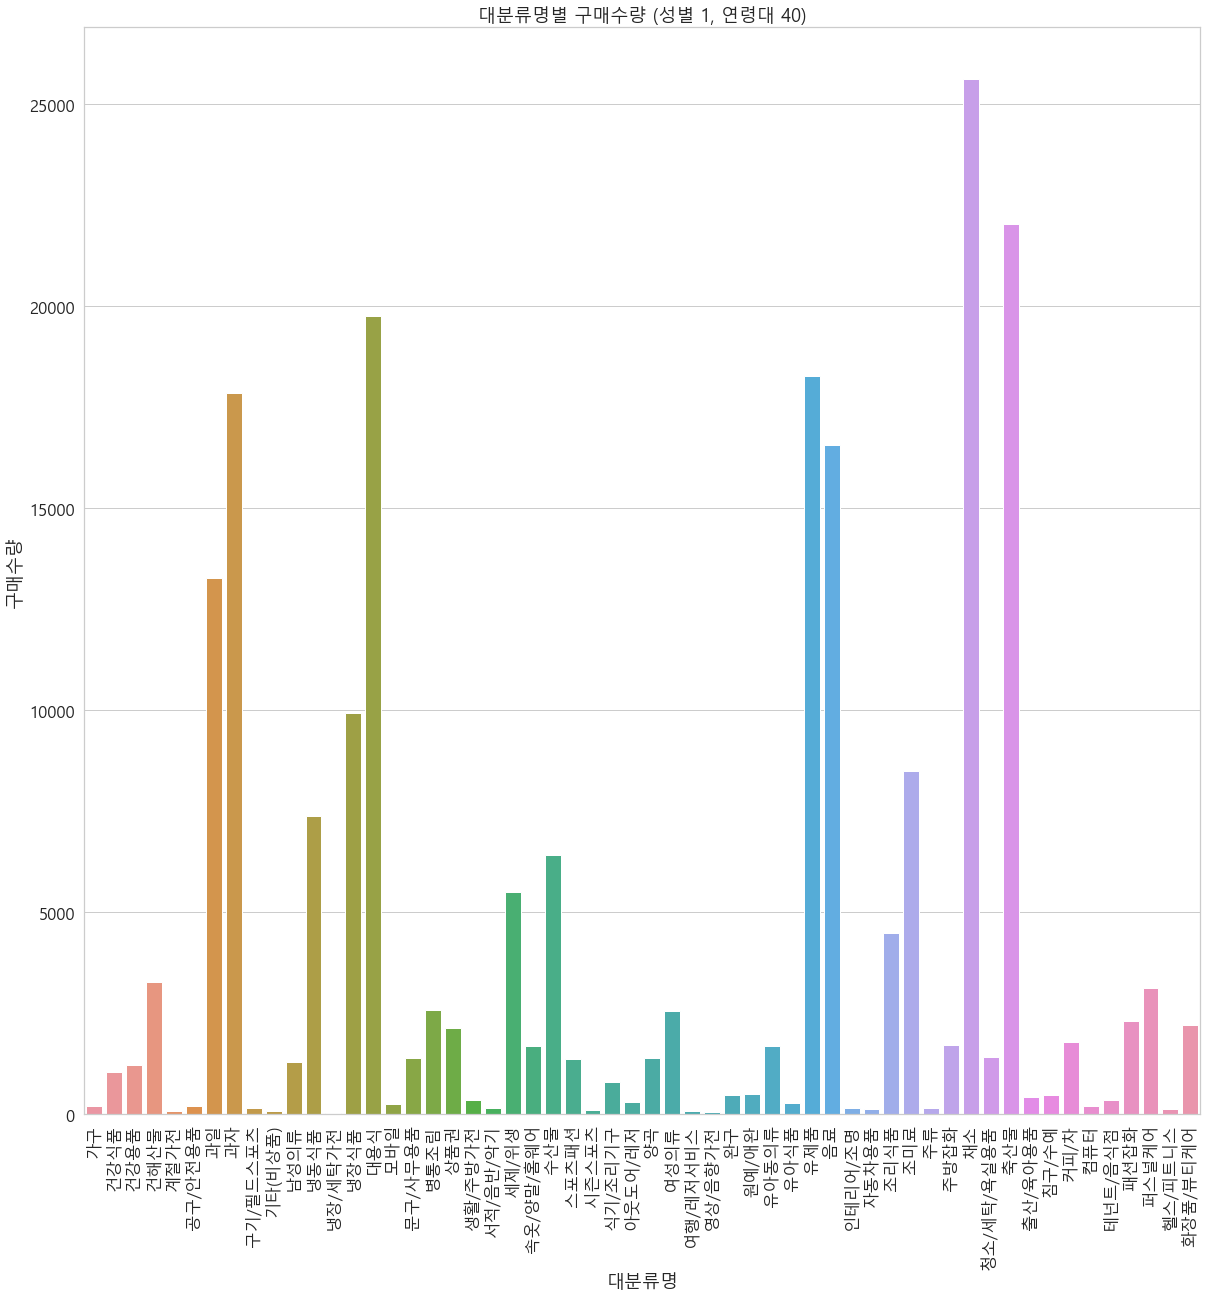

In [ ]:

# 필터링 조건 설정
filtered_data = on[(on['연령대'] == 40) & (on['성별'] == 1)]

# 대분류명별 구매수량 계산
grouped_data = filtered_data.groupby('대분류명')['구매수량'].sum().reset_index()

# 시각화
plt.figure(figsize=(20, 20))
sns.barplot(x='대분류명', y='구매수량', data=grouped_data)
plt.title('대분류명별 구매수량 (성별 1, 연령대 40)')
plt.xlabel('대분류명')
plt.ylabel('구매수량')
plt.xticks(rotation=90)
plt.show()


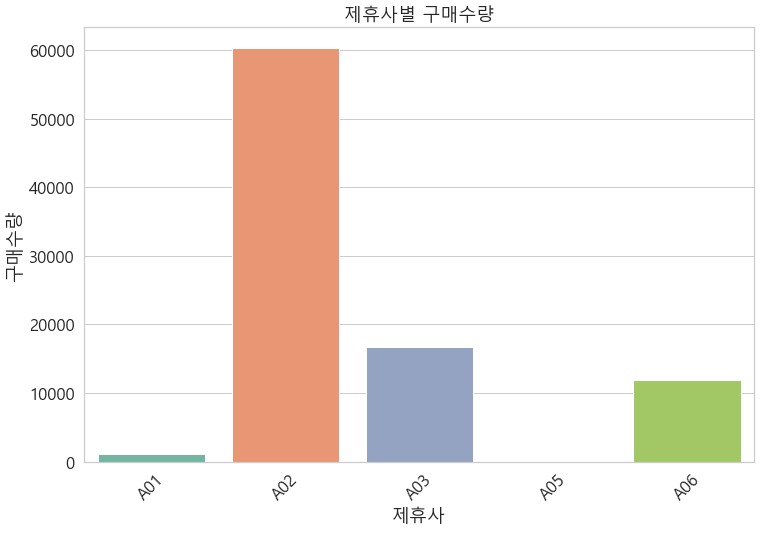

In [ ]:
on3 = on[on['구매월'] == 1]
grouped_data = on3.groupby('제휴사')['구매수량'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='제휴사', y='구매수량', data=grouped_data, ci=None)
plt.title('제휴사별 구매수량')
plt.xlabel('제휴사')
plt.ylabel('구매수량')
plt.xticks(rotation=45)
plt.show()


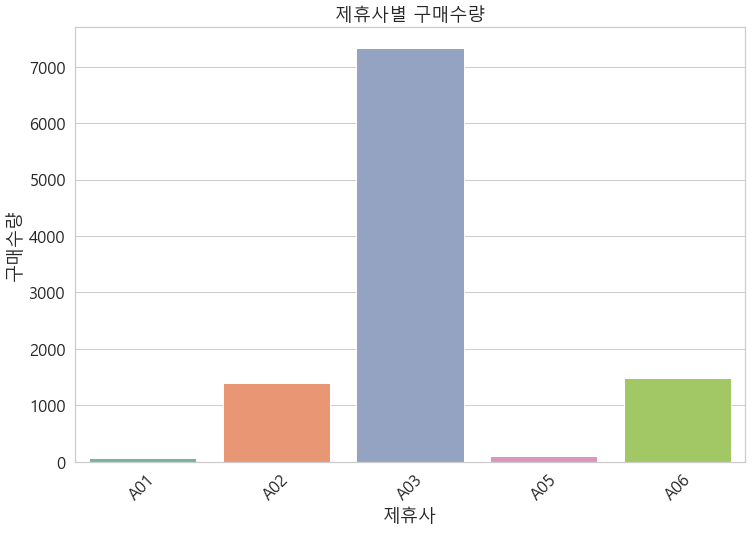

In [ ]:
on2 = on[on['구매월'] == 6]
grouped_data = on2.groupby('제휴사')['구매수량'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='제휴사', y='구매수량', data=grouped_data, ci=None)
plt.title('제휴사별 구매수량')
plt.xlabel('제휴사')
plt.ylabel('구매수량')
plt.xticks(rotation=45)
plt.show()


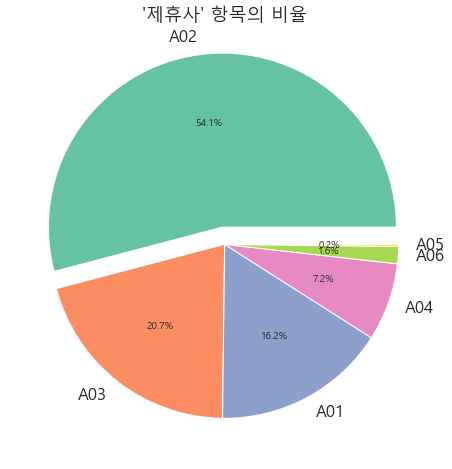

In [ ]:
# '제휴사' 항목의 빈도수 계산
counts = df['제휴사'].value_counts()

# 파이그래프 생성
labels = counts.index
sizes = counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode = [0.1, 0, 0, 0, 0, 0])
plt.title("'제휴사' 항목의 비율")

# 파이그래프 출력
plt.show()

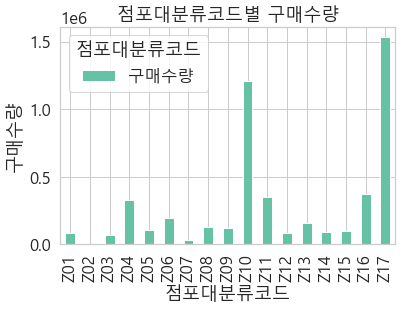

In [ ]:
# 점포대분류코드별 구매수량 계산
grouped = off.groupby(['점포대분류코드'])['구매수량'].sum()

# 시각화
grouped.plot(kind='bar', stacked=True)
plt.xlabel('점포대분류코드')
plt.ylabel('구매수량')
plt.title('점포대분류코드별 구매수량')
plt.legend(title='점포대분류코드')
plt.show()

In [ ]:
off['점포중분류코드'].value_counts()

Z17018    430199
Z17004     88474
Z17009     83747
Z04007     77043
Z17024     74784
Z10024     72075
Z17011     68802
Z10040     64013
Z16007     62963
Z16015     62806
Z13001     60589
Z17001     60434
Z17020     60144
Z17022     59523
Z10020     59231
Z15004     58017
Z11004     55859
Z10028     52127
Z10038     51816
Z10011     49997
Z17015     47971
Z06013     40886
Z09014     38138
Z10002     37762
Z10026     37666
Z17008     37434
Z03001     37336
Z13005     37169
Z10037     36801
Z06002     36795
Z10022     35612
Z10010     35586
Z10021     34621
Z04008     34008
Z11017     33851
Z11016     33825
Z04009     33048
Z17006     32926
Z10008     32878
Z10003     32554
Z16003     32396
Z04006     31815
Z16006     31339
Z05013     31139
Z06009     29682
Z10042     28934
Z10041     28446
Z11012     26946
Z17003     26574
Z16008     25405
Z16009     24662
Z05009     24634
Z01005     24464
Z10025     24390
Z04003     24283
Z12019     24274
Z11001     22905
Z10047     22695
Z14004     225

<AxesSubplot:xlabel='대분류명', ylabel='구매수량'>

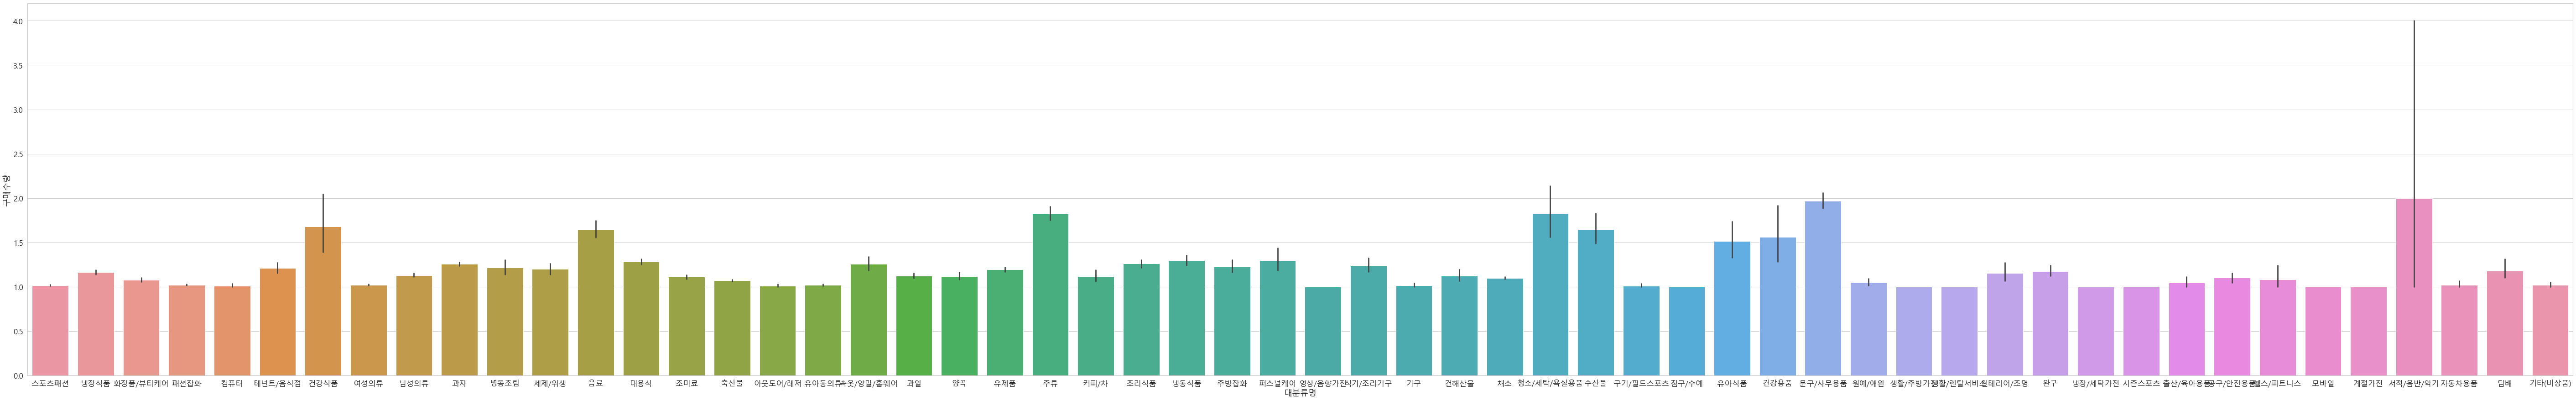

In [ ]:
code = 'Z10028'
code=off[off['점포중분류코드']==code];code
code.groupby(['대분류명'])[['구매수량']].count()
plt.figure(figsize = (100,15))
sns.barplot(x = '대분류명', y = '구매수량', data=code)

<AxesSubplot:xlabel='연령대', ylabel='구매수량'>

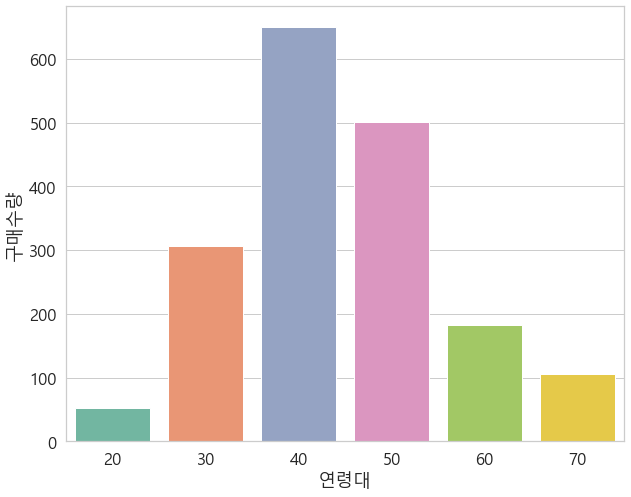

In [ ]:
Z17018=off[off['점포중분류코드']=='Z10040']
Z17018_age=Z17018.groupby(['연령대','대분류명'])[['구매수량']].count().reset_index()
Z17018_age_com=Z17018_age[Z17018_age['대분류명']=='문구/사무용품']
plt.figure(figsize = (10,8))
sns.barplot(x='연령대', y='구매수량',data=Z17018_age_com)

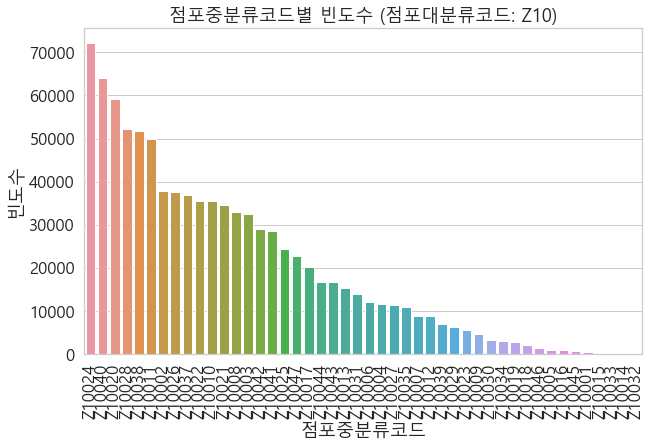

In [ ]:

# 점포대분류코드가 'Z17'인 데이터 필터링
filtered_data = off[off['점포대분류코드'] == 'Z10']

# 점포중분류코드별 빈도수 계산
grouped_data = filtered_data['점포중분류코드'].value_counts().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='점포중분류코드', data=grouped_data)
plt.title('점포중분류코드별 빈도수 (점포대분류코드: Z10)')
plt.xlabel('점포중분류코드')
plt.ylabel('빈도수')
plt.xticks(rotation=90)
plt.show()


In [ ]:
filtered_data = off[off['제휴사'] == 'A01']
c=filtered_data.groupby(['구매월','대분류명'])['구매수량'].sum()
a1=c[1]
a1.to_frame()
a6=c[6]
a6.to_frame()
h = pd.merge(a1, a6, on = '대분류명',how = 'left');h

h['증감률'] = (h['구매수량_y'] - h['구매수량_x'])/h['구매수량_x'] *100
k = (h['구매수량_x'] >= 0) & (h['증감률'] <= 0) 
# t = (h['증감률'] <=-90)
# h.loc[k]
h

,구매수량_x,구매수량_y,증감률
대분류명,,,
가구,134,149,11
건강식품,976,577,-41
건강용품,188,121,-36
건해산물,200,212,6
계절가전,23,27,17
공구/안전용품,3,1,-67
과일,1287,1585,23
과자,3547,3794,7
구기/필드스포츠,122,343,181


In [ ]:
filtered_data = on[on['제휴사'] == 'A02']
c=filtered_data.groupby(['구매월','대분류명'])['구매수량'].sum()
a1=c[5]
a1.to_frame()
a6=c[6]
a6.to_frame()
h = pd.merge(a1, a6, on = '대분류명',how = 'left');h

h['증감률'] = (h['구매수량_y'] - h['구매수량_x'])/h['구매수량_x'] *100
k = (h['구매수량_x'] >= 3000) & (h['증감률'] <=-85) 
# t = (h['증감률'] <=-90)
h.loc[k]

,구매수량_x,구매수량_y,증감률
대분류명,,,
과자,3425,110,-97
대용식,3782,150,-96
유제품,3468,114,-97
음료,3829,157,-96
채소,5668,153,-97
축산물,4606,137,-97


In [ ]:

# off_pivot = off.pivot_table(index='연령대', columns='대분류명', values='구매수량', aggfunc='sum')

# # 히트맵 그리기
# plt.figure(figsize=(20, 20))
# sns.heatmap(off_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
# plt.title('연령대별 대분류명 구매수량')
# plt.xlabel('대분류명')
# plt.ylabel('연령대')

# plt.show()


<AxesSubplot:xlabel='구매월', ylabel='count'>

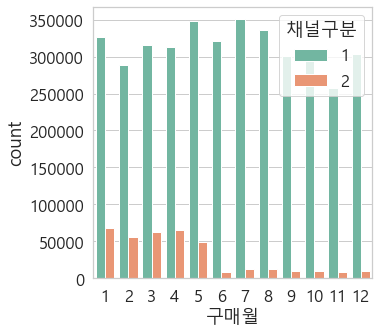

In [ ]:
# 월 별 온,오프라인 수
plt.figure(figsize = (5,5))
sns.countplot(x='구매월', hue = '채널구분', data = df,)

<AxesSubplot:xlabel='구매요일', ylabel='count'>

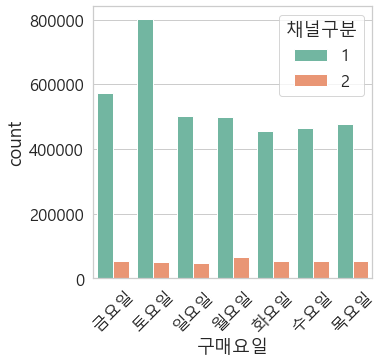

In [ ]:
# 요일 별 온,오프라인 수
plt.figure(figsize = (5,5))
plt.xticks(rotation=45)
sns.countplot(x='구매요일',hue = '채널구분', data = df)

<AxesSubplot:xlabel='연령대', ylabel='count'>

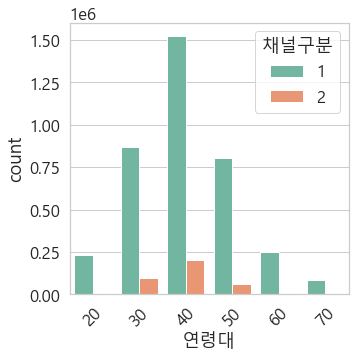

In [ ]:
# 연령대 별 온,오프라인 수
df = df.sort_values(by='연령대', ascending=True)

plt.figure(figsize = (5,5))
plt.xticks(rotation=45)
sns.countplot(x='연령대', hue = '채널구분', data = df)  #20대의 온라인 구매 수가 40대보다 낮다?

<AxesSubplot:xlabel='연령대', ylabel='count'>

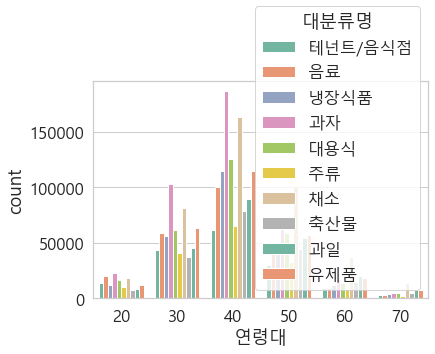

In [ ]:
# 가장 많이 판매된 대분류명 상위 10개, 연령별 시각화


# 1. 대분류명 컬럼에서 value 값의 개수를 구하고, 내림차순으로 정렬하여 상위 10개 value 값 가져오기
df_top10 = df['대분류명'].value_counts().nlargest(10).index.tolist()

# 2. 상위 10개 value 값을 가지는 데이터 추출하기
df_top10 = df[df['대분류명'].isin(df_top10)]

# 3. 연령별 시각화
sns.countplot(x='연령대', hue='대분류명', data= df_top10)

<AxesSubplot:xlabel='연령대', ylabel='count'>

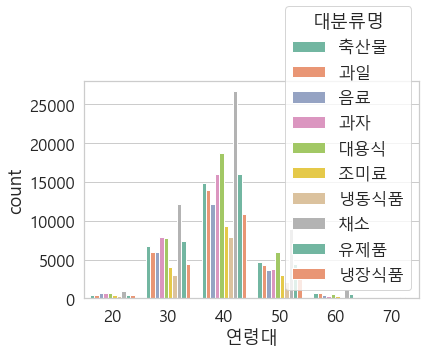

In [ ]:
# 온라인 / 가장 많이 판매된 대분류명 상위 10개, 연령별 시각화


# 1. 대분류명 컬럼에서 value 값의 개수를 구하고, 내림차순으로 정렬하여 상위 10개 value 값 가져오기
on_top10 = on['대분류명'].value_counts().nlargest(10).index.tolist()

# 2. 상위 10개 value 값을 가지는 데이터 추출하기
on_top10 = on[on['대분류명'].isin(on_top10)]

# 3. 연령별 시각화
sns.countplot(x='연령대', hue='대분류명', data=on_top10)

<AxesSubplot:xlabel='연령대', ylabel='count'>

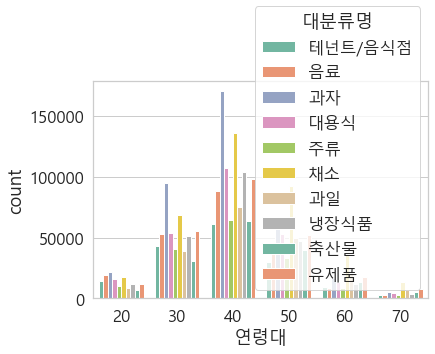

In [ ]:
# 오프라인 / 가장 많이 판매된 대분류명 상위 10개, 연령별 시각화


# 대분류명 컬럼에서 value 값의 개수를 구하고, 내림차순으로 정렬하여 상위 10개 value 값 가져오기
off_top10 = off['대분류명'].value_counts().nlargest(10).index.tolist()

# 상위 10개 value 값을 가지는 데이터 추출하기
off_top10 = off[off['대분류명'].isin(off_top10)]

# 연령별 시각화
sns.countplot(x='연령대', hue='대분류명', data=off_top10)